In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Section 1: Perform data preparation & cleaning

## Loading the data

In [4]:
#Loading the dataset into a data frame
df=pd.read_csv("C:\\Users\\cherp\\healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Number of rows and columns in data 

In [108]:
r,c=df.shape
print("data has {0} rows and {1} columns".format(r,c))

data has 5110 rows and 12 columns


## Exploring the datatyypes of each column

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Range of all Numerical and character columns

In [29]:
num = df.select_dtypes(include=[np.number])
# U = u.apply(np.ptp, axis=0)
Num = num.max() - num.min()

char = df.select_dtypes(include=[object])
Char = char.max() + ' - ' + char.min()

Num.append(Char)

id                               72873.0
age                                81.92
hypertension                         1.0
heart_disease                        1.0
avg_glucose_level                 216.62
bmi                                 87.3
stroke                               1.0
gender                    Other - Female
ever_married                    Yes - No
work_type            children - Govt_job
Residence_type             Urban - Rural
smoking_status          smokes - Unknown
dtype: object

## Dealing with Null values

In [110]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [111]:
df.bmi=df.bmi.fillna(df.bmi.mean())

In [112]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Dealing decimals in age using floor

In [68]:
df["age"]=round(df["age"].apply(np.ceil),0)
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.237769,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.591958,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,1.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Check Unique values for each Column

In [115]:
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [116]:
df["age"].value_counts()

78.0    102
57.0     95
52.0     90
54.0     87
51.0     86
       ... 
11.0     36
10.0     35
4.0      34
7.0      32
6.0      24
Name: age, Length: 83, dtype: int64

In [117]:
df["hypertension"].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [118]:
df["heart_disease"].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [119]:
df["ever_married"].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [120]:
df["work_type"].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [121]:
df["Residence_type"].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [122]:
df["avg_glucose_level"].value_counts()

93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64

In [123]:
df["bmi"].value_counts()

28.893237    201
28.700000     41
28.400000     38
27.600000     37
26.700000     37
            ... 
11.500000      1
40.600000      1
53.900000      1
97.600000      1
14.900000      1
Name: bmi, Length: 419, dtype: int64

In [124]:
df["smoking_status"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [125]:
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [126]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# Section 2 : Perform exploratory analysis & visualization 

## Mean, sum, range and standrad deviation of all numerical columns

In [63]:
#Performing exploratory analysis & Visualization
df.mean(numeric_only = True)

id                   36517.829354
age                     43.226614
hypertension             0.097456
heart_disease            0.054012
avg_glucose_level      106.147677
bmi                     28.893237
stroke                   0.048728
dtype: float64

Mean age of the patient from the data is 43.2 while the mean avg_glucose_level is 106 and mean BMI is 28.8

In [67]:
#sum on the numerical columns
df.sum(numeric_only = True).astype(int)

id                   186606108
age                     220888
hypertension               498
heart_disease              276
avg_glucose_level       542414
bmi                     141836
stroke                     249
dtype: int32

In [65]:
#range
num = df.select_dtypes(include=[np.number])
Num = num.max() - num.min()
Num

id                   72873.00
age                     81.92
hypertension             1.00
heart_disease            1.00
avg_glucose_level      216.62
bmi                     87.30
stroke                   1.00
dtype: float64

In [64]:
#standrad deviation
df.std(numeric_only = True).astype(int)

id                   21161
age                     22
hypertension             0
heart_disease            0
avg_glucose_level       45
bmi                      7
stroke                   0
dtype: int32

we can see that the sum of ages of all petient is 220,888 years and their total BMI and avg_glucose levels are 542414 and 141836 respectively.
Also, among the data,498 patient have hypertension, 276 have heart disease and 249 have stroke

## Summary statistics on the data

In [113]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Distrubution on all columns in the dataframe

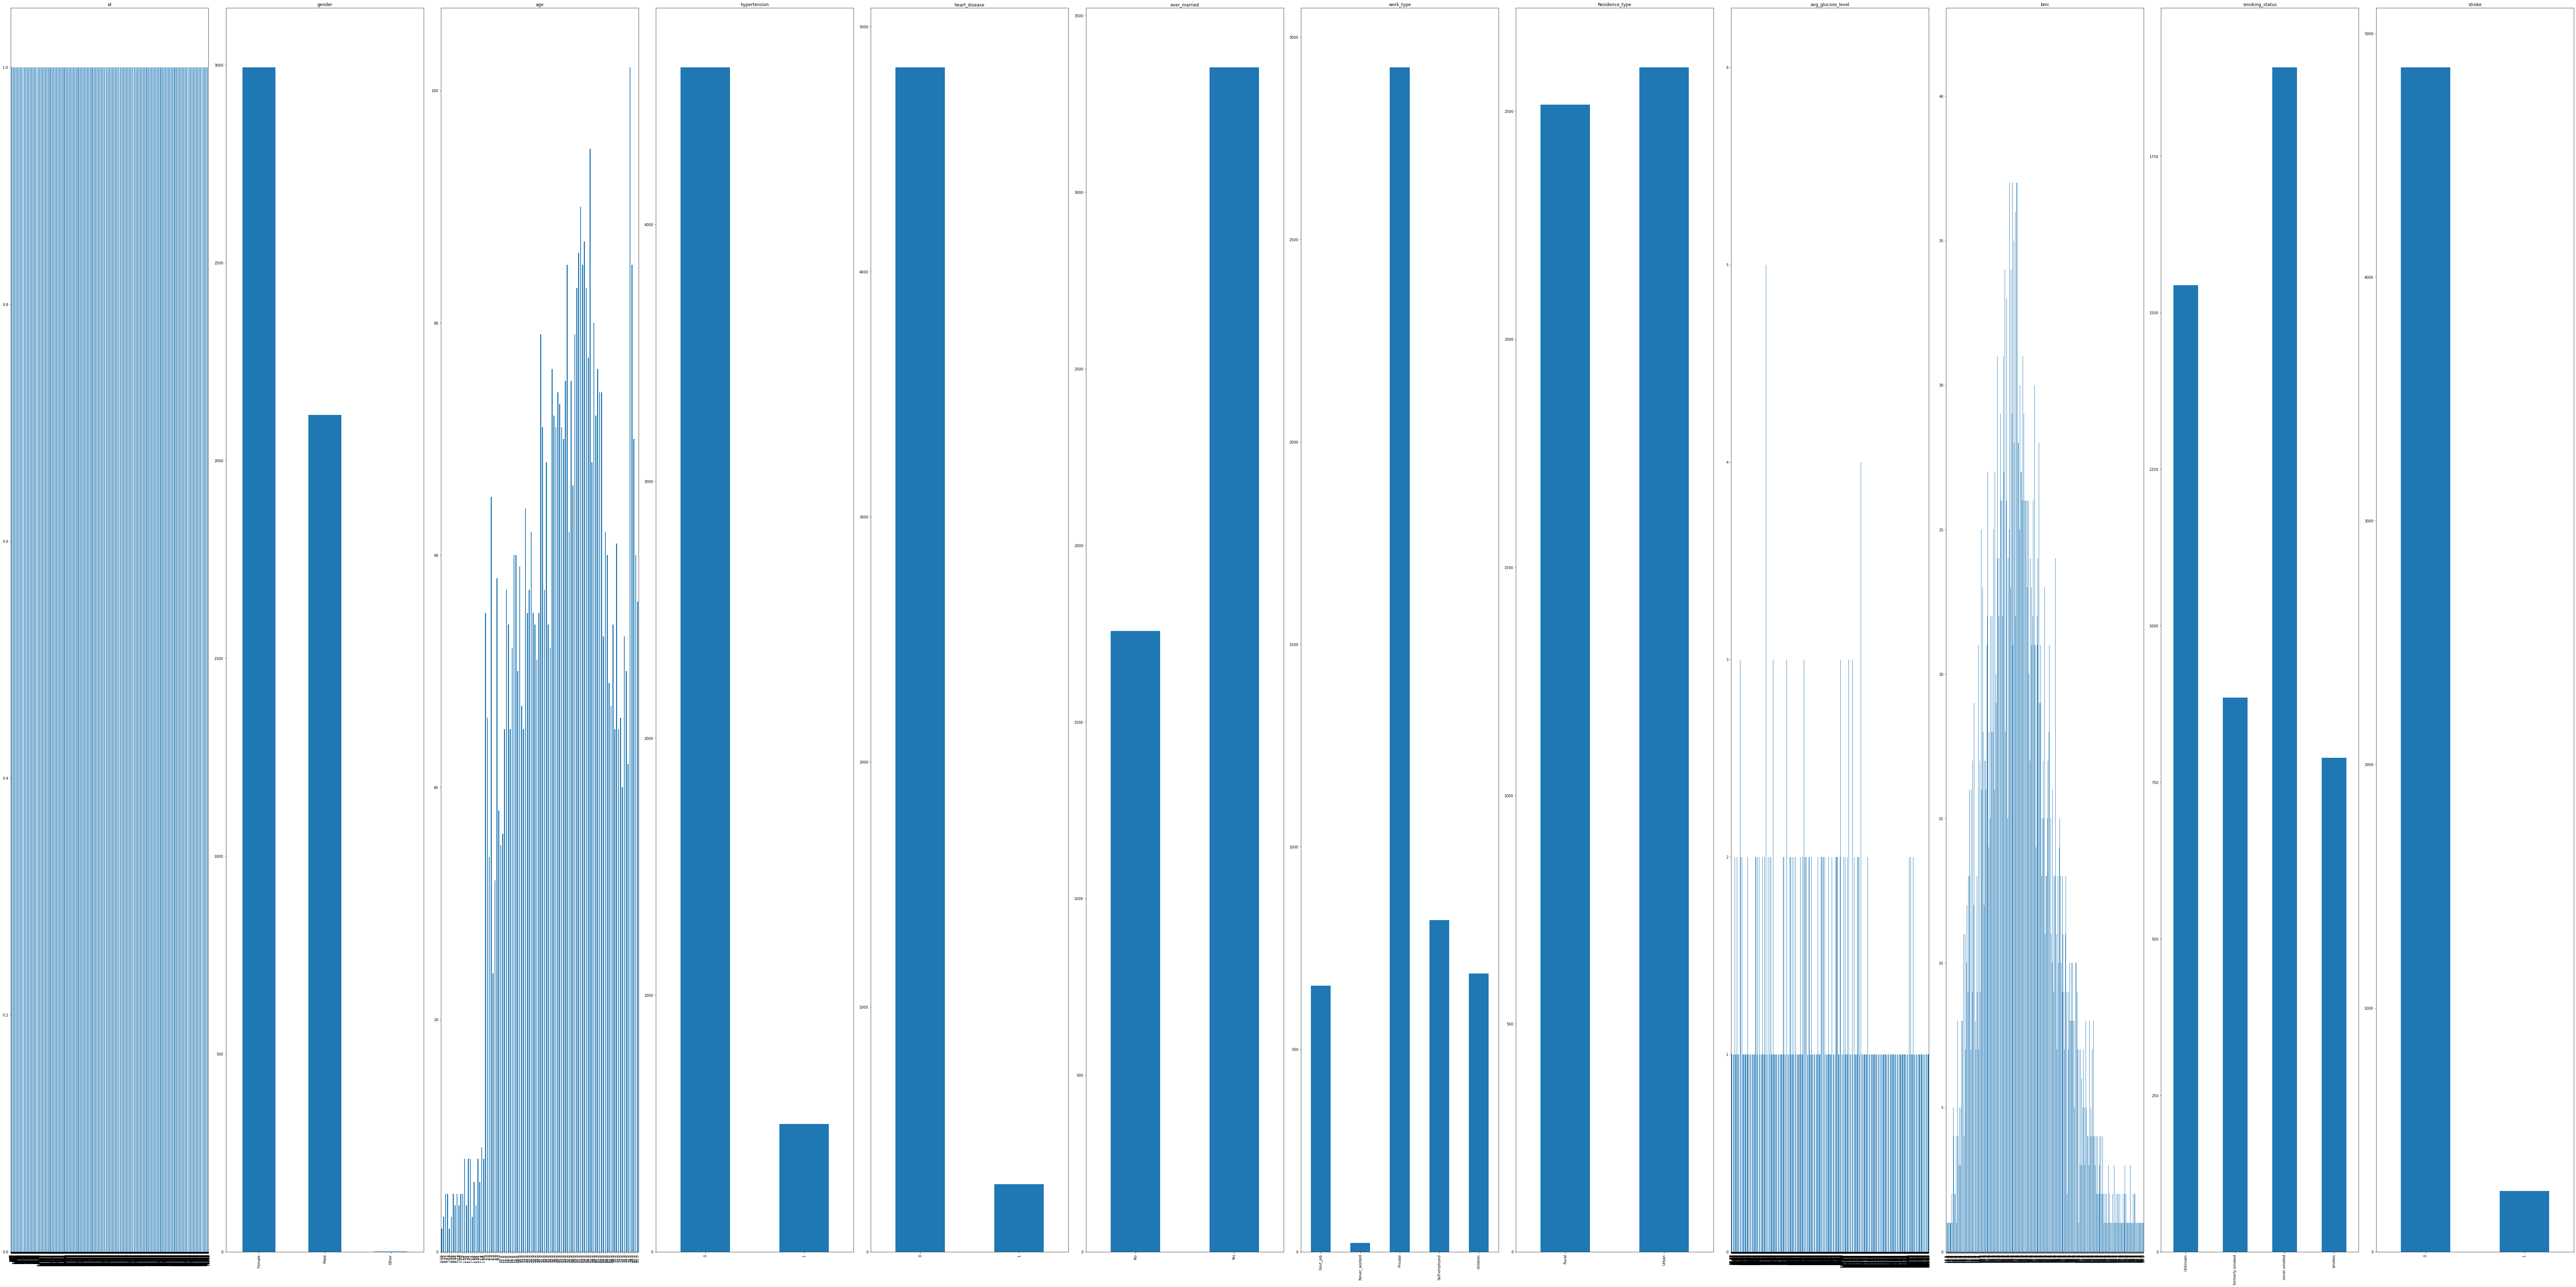

In [54]:
fig, axes = plt.subplots(ncols=len(df.columns), figsize=(100,50))
for col, ax in zip(df, axes):
    df[col].value_counts().sort_index().plot.bar(ax=ax, title=col)

plt.tight_layout()    
plt.show()

Although we are able to get a general distribution of data, we are unable to fully infer details form the graph and hence let's move on to individual graphs.

## Exploring Numerical columns using histogram

array([[<AxesSubplot:title={'center':'bmi'}>]], dtype=object)

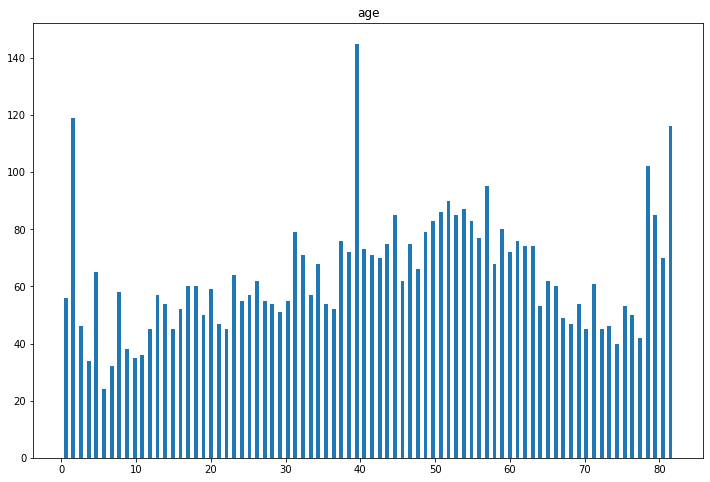

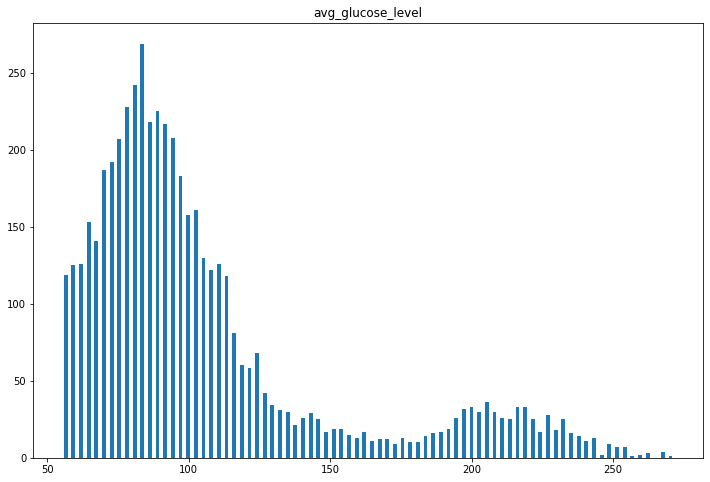

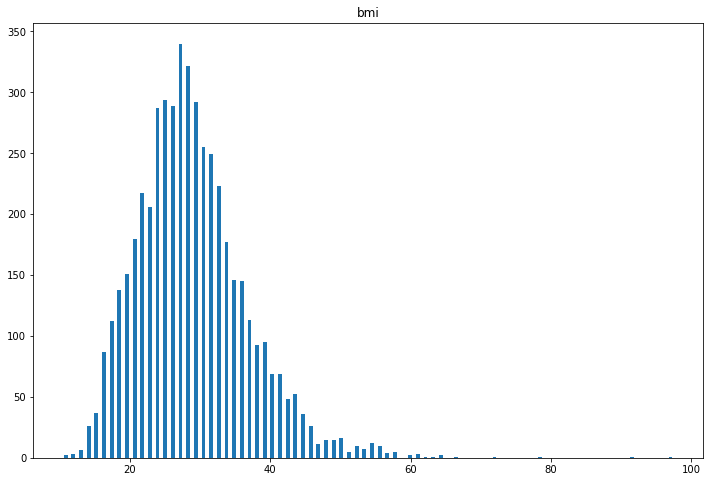

In [32]:
# import matplotlib.pyplot as plt
df.hist(column='age',bins=80, grid=False, figsize=(12,8),  zorder=2, rwidth=0.5)
df.hist(column='avg_glucose_level',bins=80, grid=False, figsize=(12,8), zorder=2, rwidth=0.5)
df.hist(column='bmi',bins=80, grid=False, figsize=(12,8), zorder=2, rwidth=0.5)

From the above histograms, we could observe the below

1. Data has people aged from 0 to 82 with majority of them being aged 40.
2. From Avg_glucose_level distribution we see that it is left skewed as most of the patients fall in 50 - 120 and very less patient having glucose_index greater than 150. 
3. From BMI distribution, we could see that the distribution is centered around the mean 28.8 with majority of the records falling between 10 - 35


## Exploring categorical columns using bar chart

<AxesSubplot:>

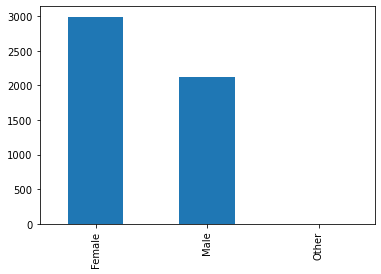

In [35]:
df['gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

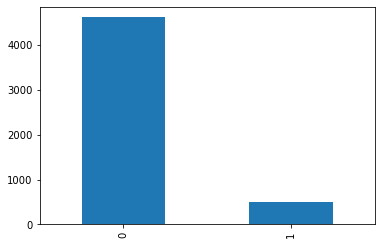

In [76]:
df['hypertension'].value_counts().plot(kind='bar')

<AxesSubplot:>

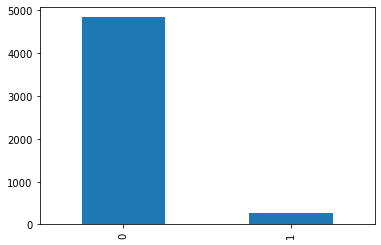

In [77]:
df['heart_disease'].value_counts().plot(kind='bar')

<AxesSubplot:>

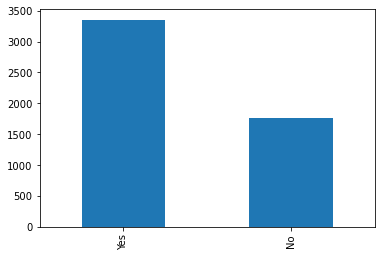

In [78]:
df['ever_married'].value_counts().plot(kind='bar')

<AxesSubplot:>

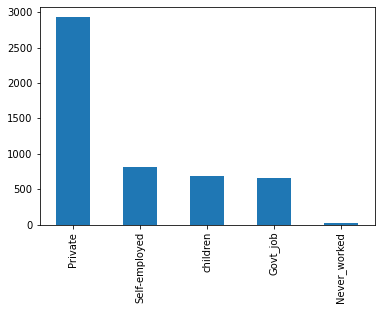

In [79]:
df['work_type'].value_counts().plot(kind='bar')

<AxesSubplot:>

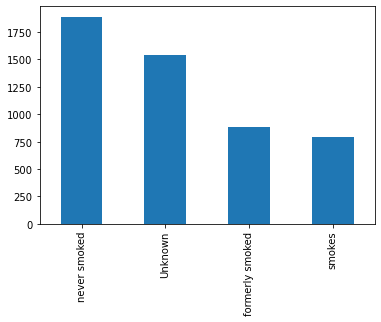

In [81]:
df['smoking_status'].value_counts().plot(kind='bar')

<AxesSubplot:>

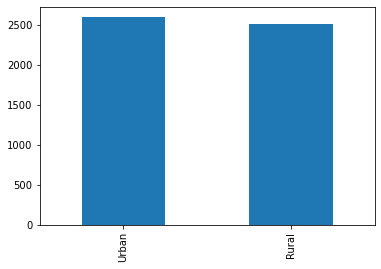

In [69]:
df['Residence_type'].value_counts().plot(kind='bar')

<AxesSubplot:>

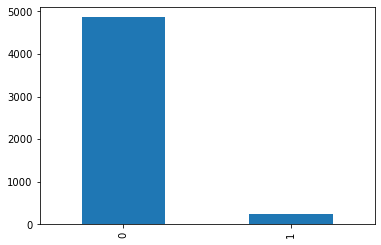

In [82]:
df['stroke'].value_counts().plot(kind='bar')

From the above barcharts, we could observe the below

1. majority of people in dataset are female
2. very less number of people have heart disease/hyper tension
3. About 2/3 of them are married and majority of the subjects work in private sector.
4. very minor percentage of them actually have had a stroke.


## Exploring Relation between columns using bar chart and scatter plot

<AxesSubplot:xlabel='work_type'>

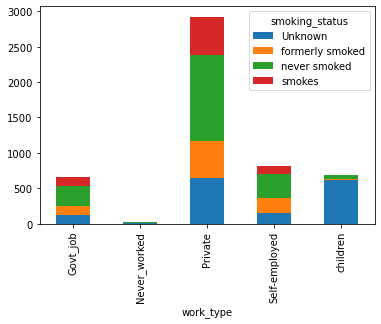

In [84]:
#smoling status versus work_type
pd.crosstab(df['work_type'],df['smoking_status']).plot(kind="bar",stacked=True)

<AxesSubplot:xlabel='stroke'>

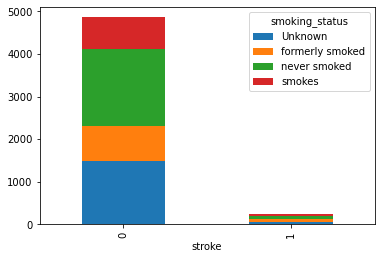

In [85]:
#smoking status versus stroke
pd.crosstab(df['stroke'],df['smoking_status']).plot(kind="bar",stacked=True)

<AxesSubplot:xlabel='gender'>

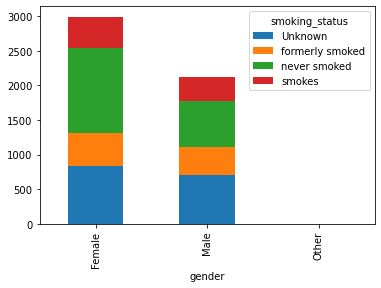

In [86]:
#smoking status versus gender
pd.crosstab(df['gender'],df['smoking_status']).plot(kind="bar",stacked=True)

<AxesSubplot:xlabel='gender'>

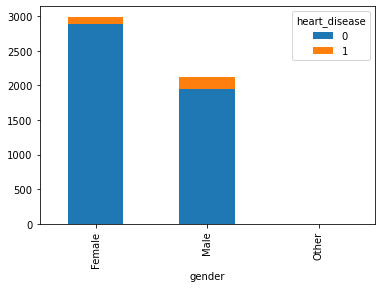

In [89]:
#heart disease versus gender
pd.crosstab(df['gender'],df['heart_disease']).plot(kind="bar",stacked=True)

From the above bar charts, we could see the below

1. Although most of the children don't somke,there is a tiny percentage of children who have smoked in the past.
2. percentage of patients who never smokes seems to be much higher among women.
2. Heart disease seems to be slightly more in men compared to women.
4. smoking doesnot seem to a strong indicator of heart disease since there seem to a lot pateints who actively smoke/have smoken in past among the patients who didnot have stroke.

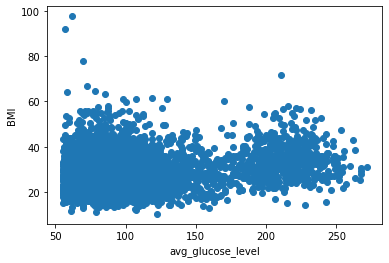

In [73]:
plt.scatter(df['avg_glucose_level'],df['bmi'], c ="tab:blue")
plt.xlabel("avg_glucose_level")
plt.ylabel("BMI");

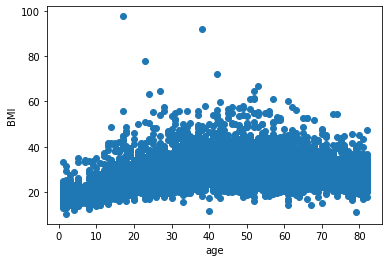

In [74]:
plt.scatter(df['age'],df['bmi'],c ="tab:blue")
plt.xlabel("age")
plt.ylabel("BMI");

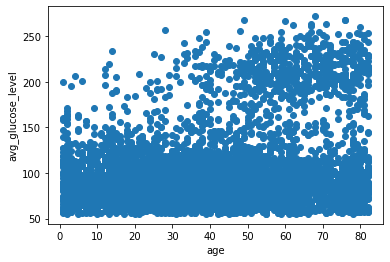

In [76]:
plt.scatter(df['age'],df['avg_glucose_level'],c ="tab:blue")
plt.xlabel("age")
plt.ylabel("avg_glucose_level");

From the above scatter plots, we could see the below

1. BMI tends to go up with increase in avg glucose levels.
2. As the age of the patient progresses, BMI tends to go up. But, we see a slight correction in trends as the patient age near 70's and 80's
3. Also, from the last lot, we see that Avg_glucose_level seems to be slowly increasing with age.

<AxesSubplot:title={'center':'gender distribution of data'}, ylabel='id'>

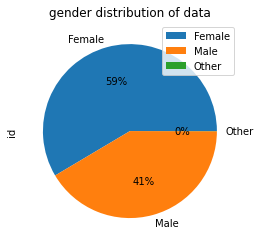

In [135]:
df.groupby(['gender']).sum().plot(kind='pie', y='id',autopct='%1.0f%%',
                                title='gender distribution of data')

<AxesSubplot:title={'center':'stroke of data'}, ylabel='id'>

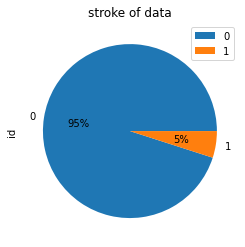

In [45]:
df.groupby(['stroke']).sum().plot(kind='pie', y='id',autopct='%1.0f%%',
                                title='stroke of data')

<AxesSubplot:title={'center':'work_type distribution of data'}, ylabel='id'>

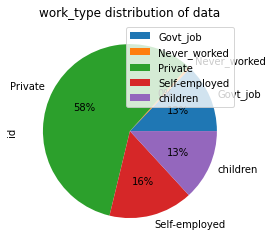

In [51]:
df.groupby(['work_type']).sum().plot(kind='pie', y='id',autopct='%1.0f%%',
                                title='work_type distribution of data')

<AxesSubplot:title={'center':'smoking status on data'}, ylabel='id'>

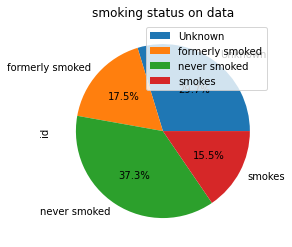

In [52]:
df.groupby(['smoking_status']).sum().plot(kind='pie', y='id',autopct='%1.1f%%',
                                title='smoking status on data')


From the above pie charts, we could see the below

1. Only 5% of the entries in the data have stroke. In other words only a few patients are stroke affected
2. Majority of the people are privately employed form the above pie charts with 58% being employed in private sector
3. while most of them dont smoke, we have almost 1/3 of people who either smoke actively/have somked in the past.
4. We also unequal distribution of data when it come sto gender with 59% being female and 41% being male.

## Section 3 : Ask Interesting Questions

<AxesSubplot:xlabel='gender'>

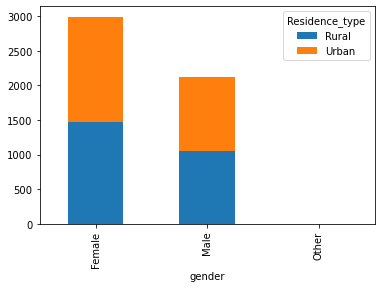

In [6]:
# What percentage of men reside in Rural areas? 
pd.crosstab(df['gender'],df['Residence_type']).plot(kind="bar",stacked=True)

### Question 1: Are males more prone to stroke than females? 

<AxesSubplot:xlabel='gender'>

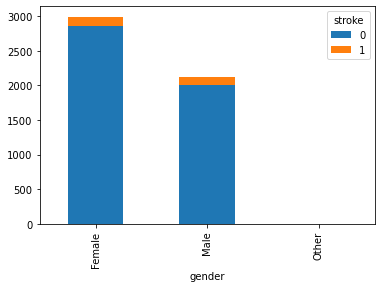

In [38]:
pd.crosstab(df['gender'],df['stroke']).plot(kind="bar",stacked=True)

From the above the bar chart we can see that stroke does affect male patients and female patients equally. In other words, Male patients are not more prone to stroke compared to female patients.

### Question2: Does people with Govt jobs have a higher bmi? : Yes from below

In [23]:
employmnet_df=df.groupby('work_type')[['bmi']].mean().sort_values('bmi', ascending=False)
employmnet_df

,bmi
work_type,
Govt_job,30.522063
Private,30.304625
Self-employed,30.211871
Never_worked,25.545455
children,20.038003


When we look at the mean of bmi among different work types, we see that people with Govt jobs tend to have more bmi

### Question 3 :what is the effect of age and avg_glucose_level for getting a stroke?

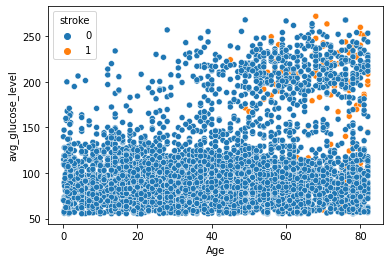

In [19]:
sns.scatterplot(x='age', y='avg_glucose_level', hue='stroke', data=df)
plt.xlabel("Age")
plt.ylabel("avg_glucose_level");

From the above plot, we can say as age progress and your glucose level increases, you are more prone to stroke

### Question 4: how does bmi and avg_glucose_level affect stroke

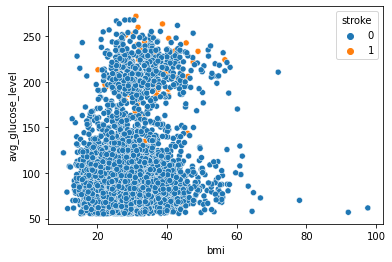

In [24]:
sns.scatterplot(x='bmi', y='avg_glucose_level', hue='stroke', data=df)
plt.xlabel("bmi")
plt.ylabel("avg_glucose_level");

From the above plot, we could say that although bmi and glucose level  are contributors for stroke, it is evidnet that avg_glucose_level is bigger constributer for stroke

### Question 5:does your bmi and avg_glucose_level go up after getting married?

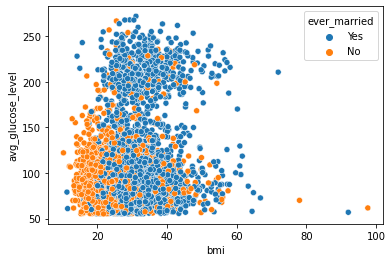

In [26]:
sns.scatterplot(x='bmi', y='avg_glucose_level', hue='ever_married', data=df)
plt.xlabel("bmi")
plt.ylabel("avg_glucose_level");

AT the first glance it might looks like people who are not married have a good chabce of keeping their bmi and glucose levels low. but let's look at other graphs to conlcude this.

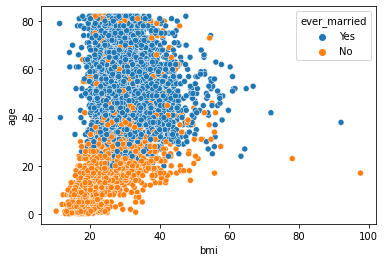

In [28]:
sns.scatterplot(x='bmi', y='age', hue='ever_married', data=df)
plt.xlabel("bmi")
plt.ylabel("age");

certainly our previous observation is not right since unmarried people are usually young and healthy

# Section 4: Inferences and Conclusions

Below are some of the inferences from the health-care stroke dataset:

- Based on the data, we see that 59% of the records corresponds to women while only 41% is male.

- Although data unequally distributed in terms of males and females, we see that number of stroke patient among males and females is equally distributed.

- Although this data is focused on predicting the stroke on patients.Only 5% of the patients in the records actually had a stroke which 95% never had it.

- Majority of the patient work in private sector and very less percentage of people have not worked.

- One of the major health indices considered worldwide is BMI - Body Mass Index and from the data, we observe that Average BMI of people working at Govt Institutions is slightly higher than people working in provate institutions.

- When we look at the age and the avg_glucose_level of the patients, we see that as age progresses, with higher glucose level, patients have a much higher chance of ending up with a stroke.

- One interesting observation we see was among unmarried people bmi and avergae glucose levels relatively much better. But form an other observation, we saw that most of the unmarried people have better BMI because they are below 20's and healthy.